In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [20]:
#Load dataset 

import os

images_path = './imgs/original/'

def load_images_to_dict(path='C:/Users/rohil/Downloads/Uni Bonn/WiSe 2020-21/PR 1/Project_02/project_02/imgs/original/', suffix='.png') -> dict:
    '''
    Loads all png files found in path
    :param path: path to folder containing images
    :return: list of numpy arrays containing loaded png files
    '''

    assert os.path.exists(path)
    png_names = [f for f in os.listdir(path) if f.endswith(suffix)]
    imgs = {}

    if len(png_names) == 0:
        print(f"No PNG files found in {path}\n returning empty dict.")

    try:
        # try to load all images in png_names
        imgs = {f: plt.imread(os.path.join(path, f)) for f in png_names}
    except FileNotFoundError as fnf:
        print(fnf)

    return imgs


def move_color_axis(img, source, target):

    return np.moveaxis(img, source, target)

In [11]:
#
# Load all images and apply their masks to them
#


# keys are file names and values are the images
masks: dict = load_images_to_dict('./imgs/mask/')
imgs: dict = load_images_to_dict('./imgs/original')

# masks and images have the same filename
img_names = list(imgs.keys())
mask_names = list(masks.keys())
print(img_names)
print(mask_names)
print(f"image shape: {imgs[img_names[0]].shape}")

# apply masks to images
masked = {}
for k in imgs.keys():
    # move color dim to front: H*W*color -> color*H*W
    img = move_color_axis(imgs[k], -1, 0)
    msk = masks[k]
    # apply mask
    mskd = img*msk
    # reshape to H*W*color
    mskd = move_color_axis(mskd, 0, -1)
    masked[k] = mskd

['img_t016.png', 'img_t008.png', 'img_t002.png', 'img_t003.png', 'img_t000.png', 'img_t020.png', 'img_t019.png', 'img_t017.png', 'img_t009.png', 'img_t007.png', 'img_t005.png', 'img_t006.png', 'img_t015.png', 'img_t014.png', 'img_t011.png']
['img_t016.png', 'img_t008.png', 'img_t002.png', 'img_t003.png', 'img_t000.png', 'img_t020.png', 'img_t019.png', 'img_t017.png', 'img_t009.png', 'img_t007.png', 'img_t005.png', 'img_t006.png', 'img_t015.png', 'img_t014.png', 'img_t011.png']
image shape: (1000, 1000, 3)


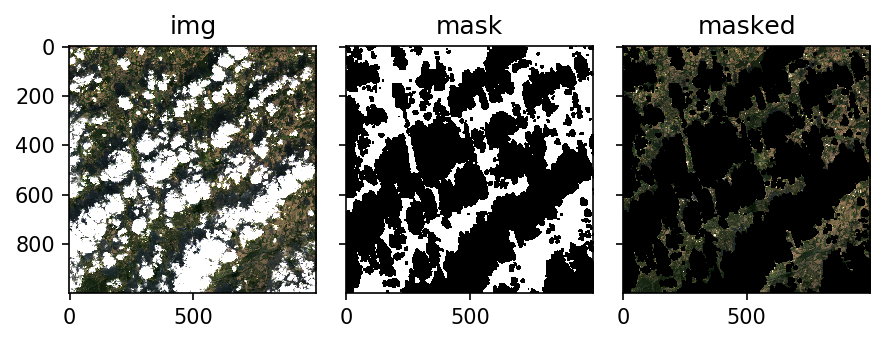

In [12]:
n = 'img_t015.png'
f, (ax1, ax2, ax3) = plt.subplots(1,3, dpi=150, sharex=True, sharey=True)
# f.suptitle(n)
ax1.imshow(imgs[n], label='test'); ax1.set_title('img')
ax2.imshow(masks[n], cmap='gray'); ax2.set_title('mask')
ax3.imshow(masked[n]); ax3.set_title('masked')
f.tight_layout()
plt.show()

In [13]:
# How many different RGB values do the images have?
im = np.array(list(masked.values())).reshape(-1, 3) * 255 # reshape and unnormalize
n_colors = np.unique(im,axis=0) 

print(f"Different colors of ground pixels: {n_colors.shape[0]}")

Different colors of ground pixels: 294494


In [14]:
n_colors.shape

(294494, 3)

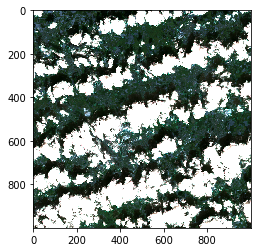

In [23]:
import cv2 as cv
img = cv.imread(images_path + 'img_t006.png')
plt.imshow(img)

In [24]:
print(img.shape)
img = img.reshape(-1,3)
img.shape

(1000, 1000, 3)


(1000000, 3)

In [25]:
def compute_l2_distance(x, centroid):    
    
    dist = ((x - centroid) ** 2).sum(axis = 1)
    return dist

In [26]:
def get_closest_centroid(x, centroids):
    
    # Loop over each centroid and compute the distance from data point.
    dist = compute_l2_distance(x, centroids)
    
    # Get the index of the centroid with the smallest distance to the data point 
    closest_centroid_index =  np.argmin(dist, axis = 0)
    
    return closest_centroid_index

In [27]:
def compute_sse(data, centroids, assigned_centroids):
    # Initialise SSE 
    sse = 0   
    sse = compute_l2_distance(data, centroids[assigned_centroids]).sum() / len(data)
    
    return sse

In [28]:
data = img

In [29]:
num_iters = 15
sse_list = []

In [30]:
import time
tic = time.time()

n = 10 # 10 clusters

centroids = np.random.randint(255, size = (n,3)) # Assign n centroid randomly in the RGB space
assigned_centroids = np.zeros(len(img), dtype = np.int32)

convergence = False

# Loop over iterations
count_iter = 0

while (convergence != True):
    count_iter += 1
    print("Iteration :", count_iter)
    
    for i in range(len(data)):
        x = data[i]
        
        x = x[None, :]   
        
        # Get the closest centroid
        closest_centroid = get_closest_centroid(x, centroids)
        
        
        # Assign the centroid to the data point.
        assigned_centroids[i] = closest_centroid
    
    for c in range(len(centroids)):
        
      
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]
        
            
        # Compute the average of cluster members to compute new centroid

        new_centroid = cluster_data.mean(axis = 0)


        # assign the new centroid
        centroids[c] = new_centroid
        
        
    sse = compute_sse(data, centroids, assigned_centroids)
    sse_list.append(sse)
    
    if(count_iter >= 2):
        if( np.abs(sse_list[-1] - sse_list[-2]) <= 0.5):
            convergence = True   

toc = time.time()

print((toc - tic))

Iteration : 1


/home/ruben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice.
/home/ruben/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8
Iteration : 9
Iteration : 10
Iteration : 11
Iteration : 12
Iteration : 13
Iteration : 14
Iteration : 15
Iteration : 16
194.5787239074707


In [32]:
centroids

array([[205, 214, 208],
       [ 86, 108, 103],
       [ 27,  51,  32],
       [163, 174, 166],
       [124, 139, 131],
       [254, 254, 254],
       [ 18,  30,  17],
       [ 39,  63,  54],
       [ 56,  81,  78],
       [  8,  16,   5]])

In [48]:
# SSE over iterations
sse_list

[1148.749788,
 442.805399,
 285.746575,
 259.735052,
 246.638229,
 238.551711,
 231.89312,
 227.131395,
 223.366456,
 220.781638,
 218.40714,
 217.567658,
 216.790686,
 215.831082,
 215.195898,
 214.403622,
 214.051299]

(array([ 30279.,  26777., 308794., 182994.,  25872.,  26499.,  70958.,
        141978., 160206.,  25643.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

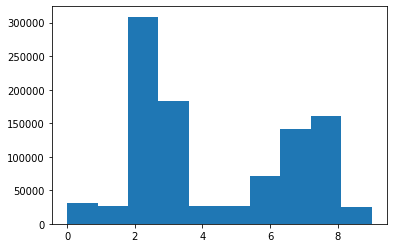

In [49]:
# Histogram
plt.hist(assigned_centroids)

In [50]:
res = centroids[assigned_centroids.flatten()]

In [51]:
result_image = res.reshape(1000,1000,3 )

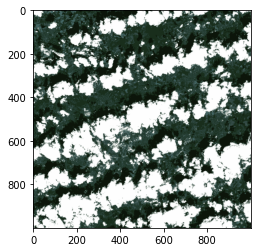

In [52]:
# With 10 clusters
plt.imshow(result_image)  

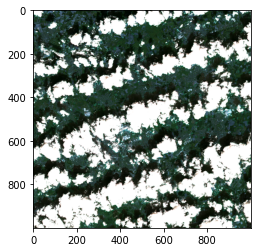

In [53]:
# Original image
plt.imshow(data.reshape(1000,1000,3))